In [1]:
#libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

2.Define the Neural Network Architecture

In [3]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),        # Flatten the input
        Dense(128, activation='relu'),           # First hidden layer
        Dropout(0.5),                            # Dropout for regularization
        Dense(64, activation='relu'),            # Second hidden layer
        Dense(num_classes, activation='softmax') # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


3. Dataset Preparation and Model Training

In [4]:
# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7824 - loss: 0.7019 - val_accuracy: 0.9484 - val_loss: 0.1718
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9242 - loss: 0.2557 - val_accuracy: 0.9576 - val_loss: 0.1429
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9376 - loss: 0.2046 - val_accuracy: 0.9637 - val_loss: 0.1253
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9432 - loss: 0.1870 - val_accuracy: 0.9679 - val_loss: 0.1142
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9495 - loss: 0.1658 - val_accuracy: 0.9683 - val_loss: 0.1094
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9530 - loss: 0.1528 - val_accuracy: 0.9695 - val_loss: 0.1114
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9543 - loss: 0.1408 - val_accuracy: 0.9704 - val_loss: 0.1020
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9564 - loss: 0.1393 

[0.08825147897005081, 0.9728000164031982]

b. CIFAR-10: Object Recognition (10 classes)

In [5]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((32, 32, 3), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1322 - loss: 2.2541 - val_accuracy: 0.1903 - val_loss: 2.1349
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.1594 - loss: 2.1677 - val_accuracy: 0.2149 - val_loss: 2.0613
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1687 - loss: 2.1487 - val_accuracy: 0.2032 - val_loss: 2.0889
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1723 - loss: 2.1375 - val_accuracy: 0.2065 - val_loss: 2.0909
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1803 - loss: 2.1304 - val_accuracy: 0.1956 - val_loss: 2.1074
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.1761 - loss: 2.1277 - val_accuracy: 0.2198 - val_loss: 2.0681
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1866 - loss: 2.1304 - val_accuracy: 0.1958 - val_loss: 2.1049
Epoch 8/10
1250/1250 ━━━━━━━━━

[2.0477089881896973, 0.2443999946117401]

c. Iris: Flower Classification (3 classes)


In [6]:
# Load and prepare the Iris dataset
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Build and train the model
model = build_model((4,), 3)  # Input shape is 4 for the Iris dataset
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.2796 - loss: 1.3689 - val_accuracy: 0.0417 - val_loss: 1.1290
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3674 - loss: 1.1617 - val_accuracy: 0.7083 - val_loss: 1.0059
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4871 - loss: 1.0549 - val_accuracy: 0.5000 - val_loss: 0.9481
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6214 - loss: 0.8879 - val_accuracy: 0.9583 - val_loss: 0.8178
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6518 - loss: 0.8712 - val_accuracy: 0.9583 - val_loss: 0.7404
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6243 - loss: 0.8725 - val_accuracy: 0.9583 - val_loss: 0.6891
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7140 - loss: 0.7605 - val_accuracy: 0.6250 - val_loss: 0.6697
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6839 - loss: 0.7094 - val_accuracy: 1.0000 - val_loss: 0.5802

[0.12448830902576447, 0.9666666388511658]

d. Fashion-MNIST: Clothing Item Classification (10 classes)


In [7]:
# Load and prepare the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6784 - loss: 0.8807 - val_accuracy: 0.8390 - val_loss: 0.4462
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8133 - loss: 0.5141 - val_accuracy: 0.8468 - val_loss: 0.4147
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8282 - loss: 0.4627 - val_accuracy: 0.8563 - val_loss: 0.3906
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8382 - loss: 0.4447 - val_accuracy: 0.8514 - val_loss: 0.3986
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8404 - loss: 0.4343 - val_accuracy: 0.8662 - val_loss: 0.3645
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8481 - loss: 0.4108 - val_accuracy: 0.8648 - val_loss: 0.3741
Epoch 7/10
1500/1500 ━━━━━━━━

[0.3684214949607849, 0.8680999875068665]

e. Reuters Newswire: Text Categorization (46 classes)

In [8]:
from tensorflow.keras.datasets import reuters

# Load and prepare the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

# Build and train the model
model = build_model((10000,), 46)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5063 - loss: 2.3127 - val_accuracy: 0.7496 - val_loss: 1.1217
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7846 - loss: 0.9513 - val_accuracy: 0.8008 - val_loss: 0.9207
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8635 - loss: 0.5929 - val_accuracy: 0.8169 - val_loss: 0.8854
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9082 - loss: 0.3885 - val_accuracy: 0.8108 - val_loss: 0.8883
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9355 - loss: 0.2615 - val_accuracy: 0.8136 - val_loss: 0.8944
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9450 - loss: 0.2339 - val_accuracy: 0.8141 - val_loss: 0.9322
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9516 - loss: 0.2027 - val_accuracy: 0.8119 - val_loss: 0.9773
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/

[1.110432505607605, 0.8027604818344116]

4. Evaluation

In [9]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Test Accuracy:", model.evaluate(x_test, y_test)[1])
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

# Example: Evaluate the MNIST model
evaluate_model(model, x_test, y_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8114 - loss: 1.0970
Test Accuracy: 0.8027604818344116
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.70      0.80      0.75       105
           2       0.74      0.70      0.72        20
           3       0.91      0.94      0.92       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.92      0.79      0.85        14
           7       1.00      0.33      0.50         3
           8       0.68      0.74      0.71        38
           9       0.78      0.84      0.81        25
          10       0.93      0.83      0.88        30
          11       0.60      0.75      0.67        83
          12       0.43      0.23      0.30        13
          13       0.55      0.73      0.63        37
          14       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


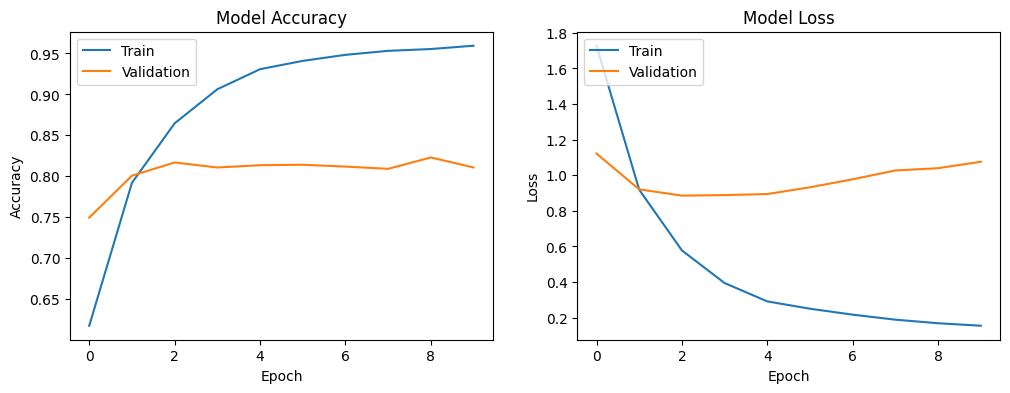

In [10]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example: Plot training history for MNIST model
plot_training_history(history)
